# Week 6
## Multi-Linear Regression

Analytics Question:
Can the geological parameters be used to predict the 𝐴√𝑘 ?  

Let's use Multi-linear regression model.
The goal is to train a multilinear regression model to understand the impact
of each of these variables on production performance (𝐴√𝑘).

In [2]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

#import data from csv file
df=pd.read_csv('Lecture6_Geologic_DataSet.csv')

#visually look at the data
df.head()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
0,8.456,292,3.080,97.680,4.64,1.848,48.306469
1,8.666,353,3.542,55.404,3.56,1.504,41.300912
2,9.814,259,4.411,87.360,3.56,2.176,49.688356
3,12.369,675,2.893,47.772,4.32,1.504,59.132694
4,12.264,457,3.498,13.128,6.04,1.520,39.503121


In [2]:
#Check the dataset dimensions
print('Shape of dataset:  ' , df.shape)

Shape of dataset:   (200, 7)


In [3]:
#check variables types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Porosity (%)                      200 non-null    float64
 1   Matrix Perm (nd)                  200 non-null    int64  
 2   Acoustic impedance (kg/m2s*10^6)  200 non-null    float64
 3   Brittleness Ratio                 200 non-null    float64
 4   TOC (%)                           200 non-null    float64
 5   Vitrinite Reflectance (%)         200 non-null    float64
 6   Aroot(K)                          200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


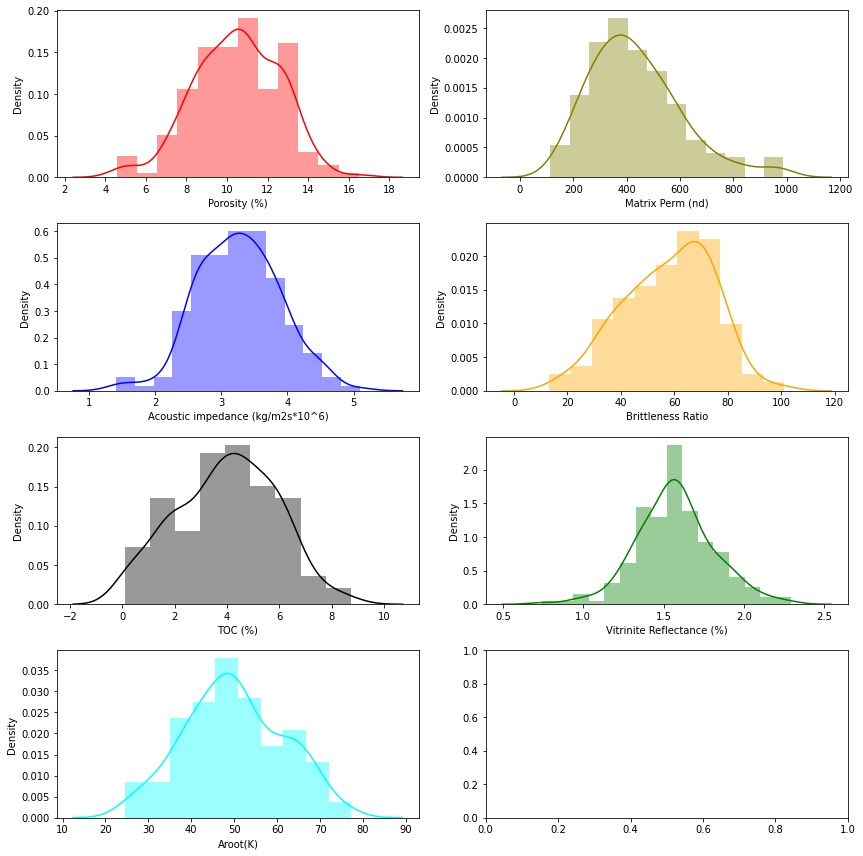

In [4]:
#let’s visualize the distribution of each parameter

f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.distplot(df['Porosity (%)'] , color="red", ax=axes[0, 0])
sns.distplot(df['Matrix Perm (nd)'] , color="olive", ax=axes[0, 1])
sns.distplot(df['Acoustic impedance (kg/m2s*10^6)'] , color="blue", ax=axes[1, 0])
sns.distplot(df['Brittleness Ratio'] , color="orange", ax=axes[1, 1])
sns.distplot(df['TOC (%)'] , color="black", ax=axes[2, 0])
sns.distplot(df['Vitrinite Reflectance (%)'] , color="green", ax=axes[2, 1])
sns.distplot(df['Aroot(K)'] , color="cyan", ax=axes[3, 0])

plt.tight_layout()

We conclude that the distribution of each parameter appears to be normal which is desired.

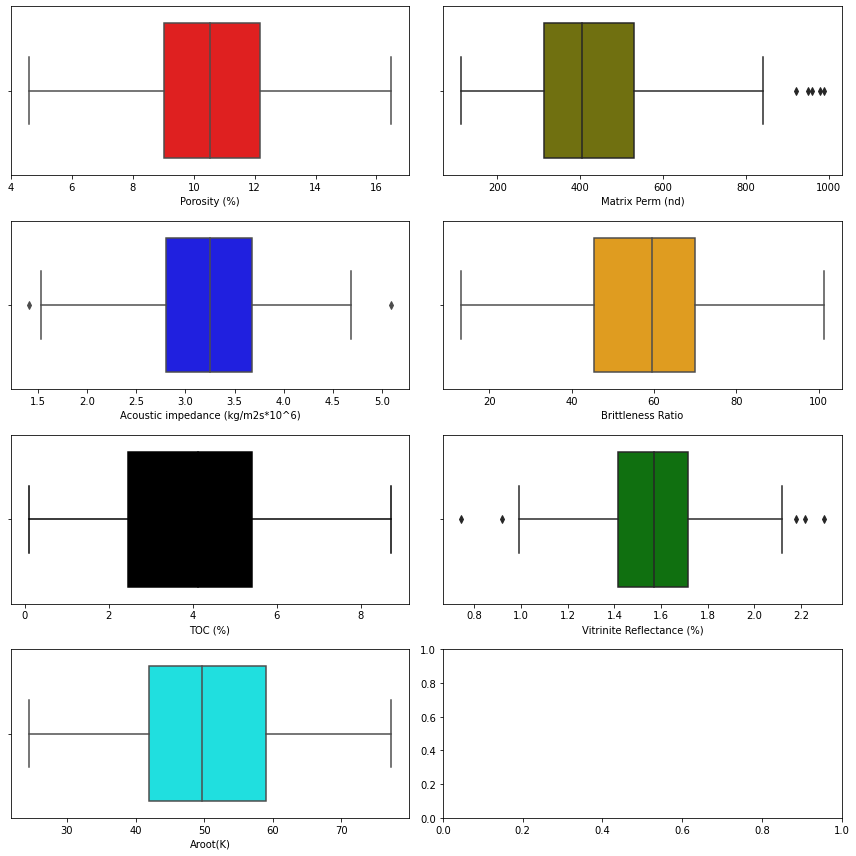

In [5]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(df['Porosity (%)'] , color="red", ax=axes[0, 0])
sns.boxplot(df['Matrix Perm (nd)'] , color="olive", ax=axes[0, 1])
sns.boxplot(df['Acoustic impedance (kg/m2s*10^6)'] , color="blue", ax=axes[1, 0])
sns.boxplot(df['Brittleness Ratio'] , color="orange", ax=axes[1, 1])
sns.boxplot(df['TOC (%)'] , color="black", ax=axes[2, 0])
sns.boxplot(df['Vitrinite Reflectance (%)'] , color="green", ax=axes[2, 1])
sns.boxplot(df['Aroot(K)'] , color="cyan", ax=axes[3, 0])

plt.tight_layout()

#### Let's understand of the relationship between input features and Aroot(K) (output feature) using scatter plots.

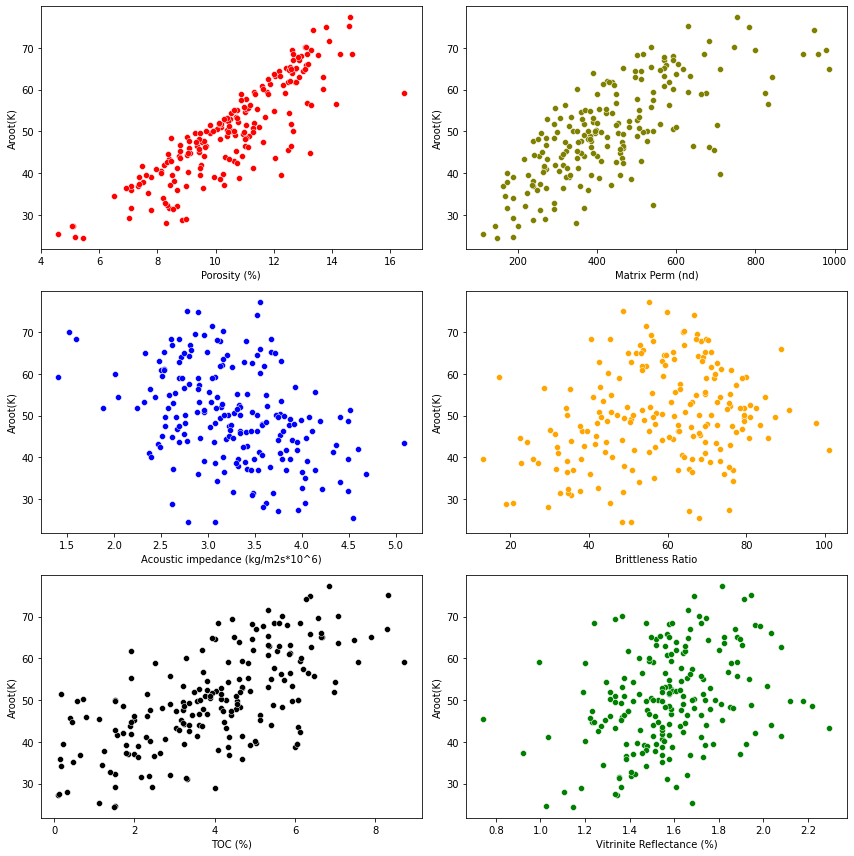

In [6]:
f, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.scatterplot(df['Porosity (%)'] ,df['Aroot(K)'], color="red", ax=axes[0, 0])
sns.scatterplot(df['Matrix Perm (nd)'] ,df['Aroot(K)'], color="olive", ax=axes[0, 1])
sns.scatterplot(df['Acoustic impedance (kg/m2s*10^6)'] , df['Aroot(K)'],color="blue", ax=axes[1, 0])
sns.scatterplot(df['Brittleness Ratio'] , df['Aroot(K)'],color="orange", ax=axes[1, 1])
sns.scatterplot(df['TOC (%)'] , df['Aroot(K)'],color="black", ax=axes[2, 0])
sns.scatterplot(df['Vitrinite Reflectance (%)'] ,df['Aroot(K)'], color="green", ax=axes[2, 1])

plt.tight_layout()

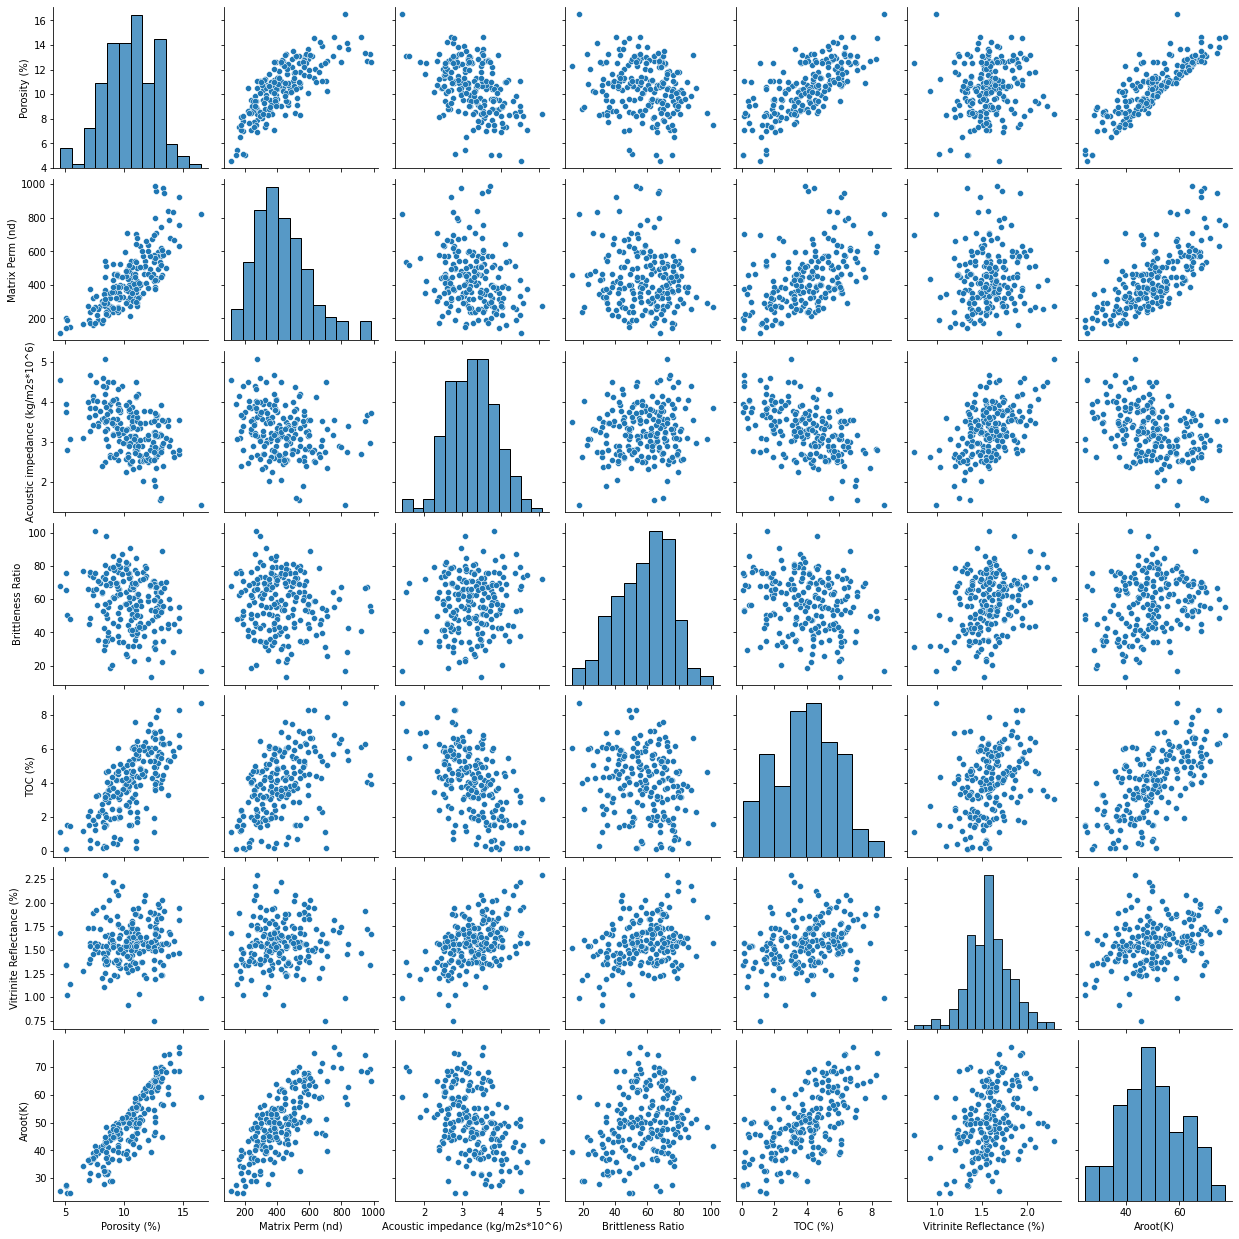

In [7]:
sns.pairplot(df)

To find whether there are collinear input features, let’s use the seaborn
library to draw a heat map with Pearson correlation coefficient inside of each
square.

<AxesSubplot:>

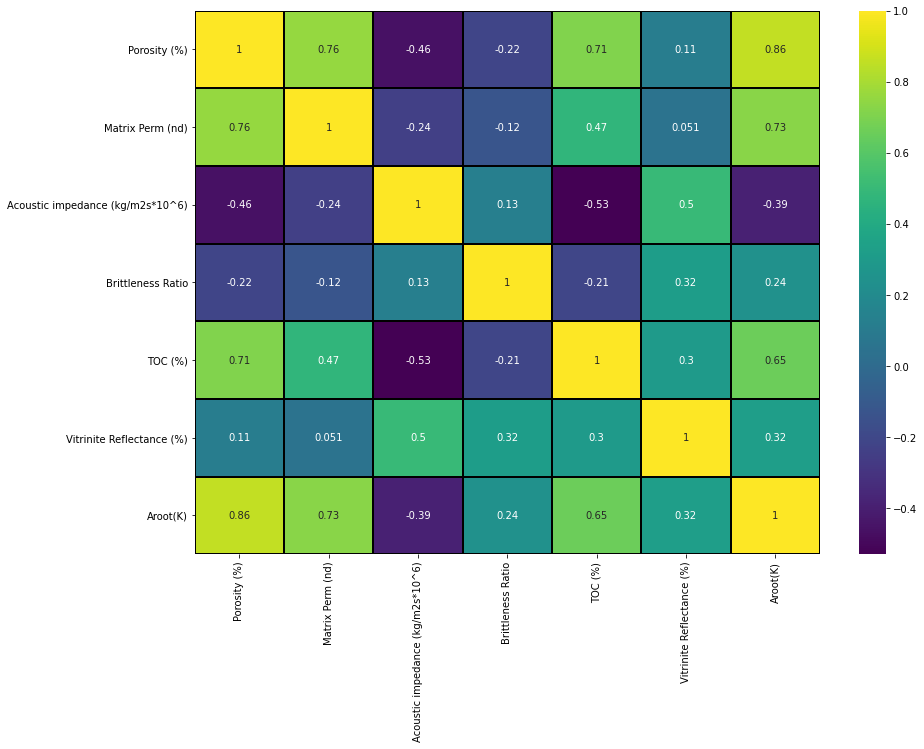

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),linewidths=2, linecolor='black',cmap='viridis', annot=True)

As shown from the heatmap, porosity and matrix perm are highly correlated with a Pearson correlation coefficient of 0.76. <br>
In addition, porosity and TOC have a strong Pearson correlation coefficient of 0.71. Since matrix perm and TOC provide similar information as porosity, it is recommended to drop these two features prior to proceeding with the next step.

In [9]:
df.drop(['TOC (%)', 'Matrix Perm (nd)'], axis=1, inplace=True) #"inplace=True" to make sure these two columns are dropped permanently.

<AxesSubplot:>

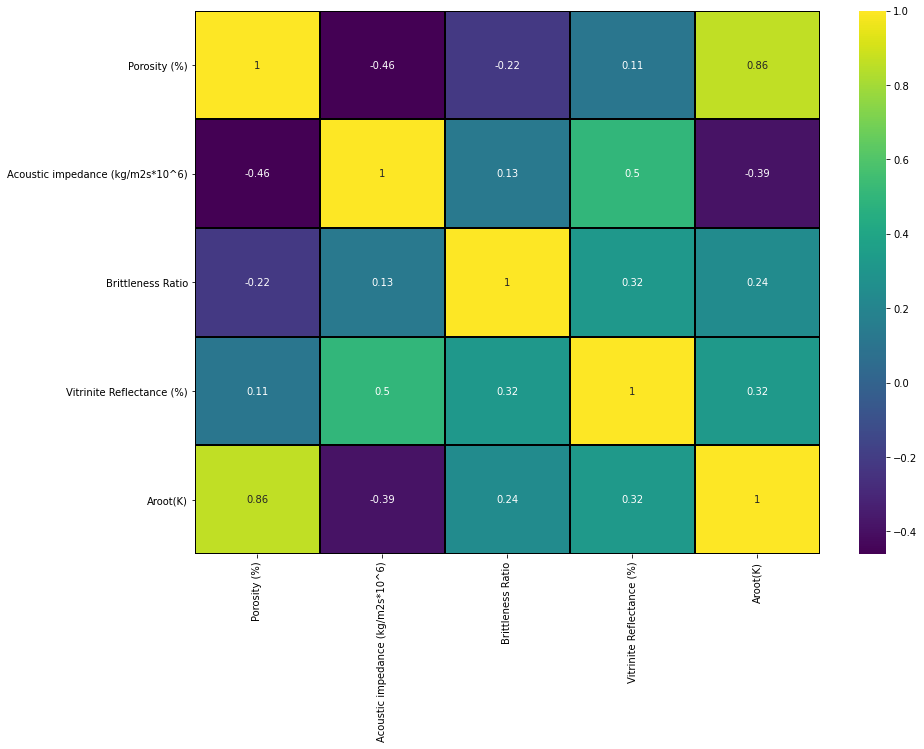

In [10]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),linewidths=2, linecolor='black',cmap='viridis', annot=True)

In [11]:
from sklearn import preprocessing
#let’s normalize the input features prior to applying multilinear regression using MinMaxScaler
scalerX=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerX.fit(df[['Porosity (%)', 'Acoustic impedance (kg/m2s*10^6)', 'Brittleness Ratio',
       'Vitrinite Reflectance (%)']])
scalerY=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerY.fit(df[['Aroot(K)']])

dfX_scaled=scalerX.transform(df[['Porosity (%)', 'Acoustic impedance (kg/m2s*10^6)', 'Brittleness Ratio',
       'Vitrinite Reflectance (%)']]) #will return an array
dfY_scaled=scalerY.transform(df[['Aroot(K)']]) #will return an array
dfX_scaled

array([[0.32529412, 0.45373134, 0.9600763 , 0.71134021],
       [0.34294118, 0.57910448, 0.48003815, 0.48969072],
       [0.43941176, 0.81492537, 0.84289413, 0.92268041],
       [0.65411765, 0.40298507, 0.39337784, 0.48969072],
       [0.64529412, 0.56716418, 0.        , 0.5       ],
       [0.46941176, 0.42089552, 0.5812781 , 0.3814433 ],
       [0.40823529, 0.49253731, 0.71903529, 0.4742268 ],
       [0.29588235, 0.5880597 , 0.5731026 , 0.51546392],
       [0.35117647, 0.34328358, 0.74710451, 0.54123711],
       [0.39411765, 0.72537313, 0.75296362, 0.88659794],
       [0.49941176, 0.28059701, 0.68360812, 0.43298969],
       [0.56705882, 0.30149254, 0.51996185, 0.47938144],
       [0.60411765, 0.45373134, 0.75909524, 0.54123711],
       [0.63764706, 0.37910448, 0.61983922, 0.64948454],
       [0.42823529, 0.36716418, 0.75323614, 0.36597938],
       [0.28176471, 0.64179104, 0.64164055, 0.62886598],
       [0.76470588, 0.53731343, 0.33451424, 0.5257732 ],
       [0.53117647, 0.37313433,

In [12]:
df_scaled=pd.DataFrame(dfX_scaled, columns=['Porosity (%)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'Vitrinite Reflectance (%)'])
df_scaled['Aroot(K)']=dfY_scaled
df_scaled

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,0.325294,0.453731,0.960076,0.711340,0.451776
1,0.342941,0.579104,0.480038,0.489691,0.319177
2,0.439412,0.814925,0.842894,0.922680,0.477932
3,0.654118,0.402985,0.393378,0.489691,0.656690
4,0.645294,0.567164,0.000000,0.500000,0.285149
...,...,...,...,...,...
195,0.317647,0.504478,0.766317,0.582474,0.382052
196,0.672941,0.626866,0.454830,0.592784,0.767007
197,0.327647,0.668657,0.628560,0.412371,0.285905
198,0.529412,0.358209,0.644638,0.731959,0.654256


In [13]:
#to train a supervised our model, let’s define x features (input) which is all the df_scaled columns minus Aroot(k)
x_scaled=df_scaled.drop(['Aroot(K)'], axis=1)
#let’s define our only y features (output)
y_scaled=df_scaled['Aroot(K)']

x_scaled

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%)
0,0.325294,0.453731,0.960076,0.711340
1,0.342941,0.579104,0.480038,0.489691
2,0.439412,0.814925,0.842894,0.922680
3,0.654118,0.402985,0.393378,0.489691
4,0.645294,0.567164,0.000000,0.500000
...,...,...,...,...
195,0.317647,0.504478,0.766317,0.582474
196,0.672941,0.626866,0.454830,0.592784
197,0.327647,0.668657,0.628560,0.412371
198,0.529412,0.358209,0.644638,0.731959


In [14]:
y_scaled

0      0.451776
1      0.319177
2      0.477932
3      0.656690
4      0.285149
         ...   
195    0.382052
196    0.767007
197    0.285905
198    0.654256
199    1.000000
Name: Aroot(K), Length: 200, dtype: float64

In [15]:
#The next step in training a model is to split data to training and testing.
from sklearn.model_selection import train_test_split
seed= 1000
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3)

In [16]:
X_train

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%)
44,0.695294,0.382090,0.453468,0.726804
101,0.401176,0.525373,0.562611,0.407216
25,0.042353,0.635821,0.594359,0.386598
3,0.654118,0.402985,0.393378,0.489691
68,0.487647,0.641791,0.515874,0.608247
...,...,...,...,...
94,0.541176,0.459701,0.814007,0.572165
192,0.812941,0.325373,0.365445,0.546392
71,0.448235,0.489552,0.658945,0.505155
87,0.490000,0.602985,0.713585,0.567010


In [17]:
from sklearn.linear_model import LinearRegression
np.random.seed(seed)
lm = LinearRegression() #initialize an instance of the linear model
lm.fit(X_train,y_train) #fit the lm model to the training rows
print("Linear Regression Intercept :", lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,x_scaled.columns,columns=['Coefficient'])
coeff_df

Linear Regression Intercept : -0.29565316262910485


,Coefficient
Porosity (%),1.069765
Acoustic impedance (kg/m2s*10^6),-0.178141
Brittleness Ratio,0.426330
Vitrinite Reflectance (%),0.231669


Text(0.5, 1.0, 'Actual Vs. Predicted Training')

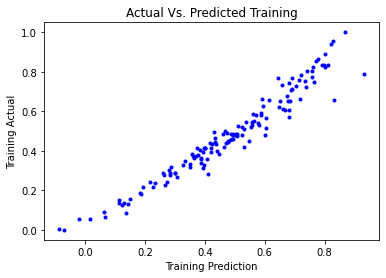

In [18]:
y_prediction=lm.predict(X_train)
plt.plot(y_prediction, y_train, 'b.')
plt.xlabel('Training Prediction')
plt.ylabel('Training Actual')
plt.title('Actual Vs. Predicted Training')

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

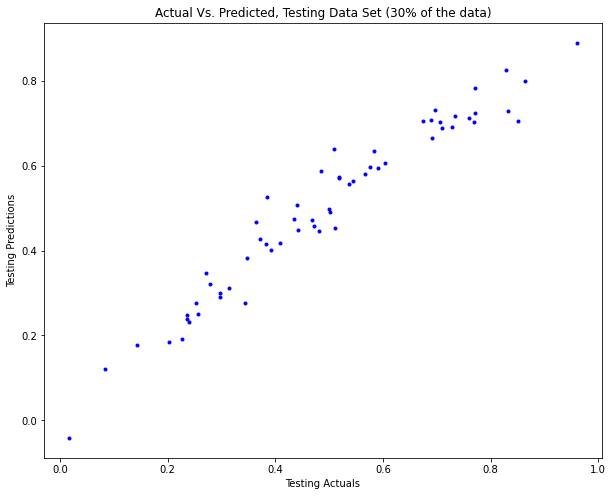

In [19]:
plt.figure(figsize=(10,8))
y_pred = lm.predict(X_test)
plt.plot(y_test,y_pred, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)')

In [20]:
from sklearn.metrics import r2_score
test_set_r2 = r2_score(y_test,y_pred)
print('Testing r^2:',round(test_set_r2,4))

Testing r^2: 0.9416


In [21]:
train_set_r2 = r2_score(y_prediction, y_train)
print('Train r^2:',round(train_set_r2,4))

Train r^2: 0.9427


Is there a big difference between the training and testing r2?
Can the model be generalized? Is the model overfitting?

In [22]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))

MAE: 0.03793
MSE: 0.00266
RMSE: 0.05159


In [23]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_train, y_prediction),5))
print('MSE:', round(metrics.mean_squared_error(y_train, y_prediction),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, y_prediction)),5))

MAE: 0.03768
MSE: 0.00259
RMSE: 0.05091


<AxesSubplot:xlabel='Aroot(K)', ylabel='Density'>

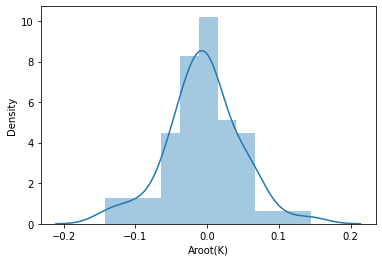

In [24]:
#let’s create a histogram of the distribution of residuals (difference between predicted y and actual y)
sns.distplot((y_test-y_pred))

When the residual is normally distributed, it is one sign that the model was
the correct choice for the data set.

In [25]:
import statsmodels.api as sm
X = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train,X).fit()
predictions = model.predict(X) 
 
model_stats = model.summary()
model_stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Aroot(K)   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     589.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           2.26e-84
Time:                        01:04:38   Log-Likelihood:                 218.23
No. Observations:                 140   AIC:                            -426.5
Df Residuals:                     135   BIC:                            -411.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.2957      0.030     -9.761      0.000      -0.356      -0.236
Porosity (%)                         1.0698      0.035     30.654      0.000       1.001       1.139
Acoustic impedance (kg/m2s*10^6)    -0.1781      0.040     -4.400      0.000      -0.258      -0.098
Brittleness Ratio                    0.4263      0.027     16.083      0.000       0.374       0.479
Vitrinite Reflectance (%)            0.2317      0.039      5.899      0.000       0.154       0.309
==============================================================================
Omnibus:                        6.746   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                9.002
Skew:                          -0.252   Prob(JB):                       0.0111
Kurtosis:                       4.136   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The Pvalues are all less than 0.05 so all the variables are statiscially significant with the ArooK.
- R2 increased as compared to simple linear regression model.

- The intercept and coefficients for each parameter match with what was already obtained.

### Diagnostics and Assumptions
Follow the same steps as presented in the simple linear regression example.

#### Diagnostics
To check if the model has any problems and how the model is performing.
Methods:
- Plotting Residuals vs. Fitted Values
- Normal Q-Q plot
- sqrt(abs(Standardized residuals)) vs. Fitted Values
- Studentized residuals vs Leverage to see if we have any bias.


#### Statistical Assumptions
Linear regression have assumptions that has to be met.
- __Linearity__: There should be linear relationship between DV and IV. If there is a relation but not normal, use diff. model.
- __Normality__: Independent variables and residuals should be normally distributed.
- __Multicollineraity__: Independent variables should not be highly colerated. (For Multlinear Regression)
- __Auto-correlation__: Residuals should be independent from one another. (If residuals are relying on one another, then we will have bias)
- __Homoscedasticity__: Residuals should be equal across the calculated regression line. (Make sure we dont have peaks across the line, make sure no bias)

<hr style="border:2px solid black"> </hr>

### In class practice excercise:
##### Assume we would like to predict the Aroot(k) for the following paramters.
- Porosity (%): 8.456
- Acoustic impedance (kg/m2s*10^6): 3.080
- Brittleness Ratio: 97.680
- Vitrinite Reflectance (%): 1.848			
##### What do we need to do to ?

<hr style="border:2px solid black"> </hr>

##### Which parameters/variables should I include in the model ? Which model we should select ?

Depends in your analytics question and your goal.....What is the analytics question ? <br>

Recalling Predictive analytics: 
- Predict the Aroot(k) given the geological parameters. 
- For this analytics question we are more concerned about the prediction result and less concerned about the interpretability.
- It doesnt matter how complex is our model as long as you have the variables you will need for the prediction.

Recalling Prescriptive analytics: <br>
- Recommeding actions you can take to affect the Aroot(k). 
- Simpler models are prefered for interpretability. 

-----
##### Omitting and keeping variables
__Omitting__ variable(s) that should have been kept will affect negtively on the model and will introduce biases.<br>
__Keeping__ variable(s) that should have been omitted (not important) will increase your R2 artifically.
Adding more independent variables or predictors to a regression model tends to increase the R-squared value, which tempts makers of the model to add even more variables. This is called overfitting and can return an unwarranted high R-squared value.

###### So how do we know ?
__1- ANOVA Model Comparison:__ Simpliest method using ANOVA and the null hupothesis which is that the models are performing equally.<br>
__2- Stepwise Regression:__ Stepwise regression is a way to build a model by adding or removing predictor variables, usually via a series of F-tests or T-tests. In simple terms, stepwise regression is a process that helps determine which factors are important and which are not. Certain variables have a rather high p-value and were not meaningfully contributing to the accuracy of our prediction. We use the AIC (Akaike Information Criteria) to determince the best model, and the machine can search forward or backward.<br> 
__3- many more methods....__

In [3]:
## ANOVA Model Comparison:
df_ = df.rename(columns={'Porosity (%)': 'Porosity', 
                        'Matrix Perm (nd)': 'Matrix_Perm', 
                        'Acoustic impedance (kg/m2s*10^6)': 'Acoustic_impedance', 
                        'Brittleness Ratio': 'Brittleness_Ratio', 
                        'TOC (%)': 'TOC', 
                        'Vitrinite Reflectance (%)': 'Vitrinite_Reflectance',
                        'Aroot(K)':'ArootK'})
#Model Selection
#Using Anova for Comparison
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
BaseModel=smf.ols('ArootK~Porosity+Acoustic_impedance+Brittleness_Ratio+Vitrinite_Reflectance',data=df_).fit()
Model1=smf.ols('ArootK~Porosity+Acoustic_impedance+Brittleness_Ratio',data=df_).fit()
Model2=smf.ols('ArootK~Porosity+Acoustic_impedance',data=df_).fit()
M1_M2_Compared=anova_lm(Model2, Model1)
BM_M1_Compared=anova_lm(Model1,BaseModel)

print(M1_M2_Compared)
print(BM_M1_Compared)

   df_resid          ssr  df_diff     ss_diff           F        Pr(>F)
0     197.0  6771.227786      0.0         NaN         NaN           NaN
1     196.0  1762.509656      1.0  5008.71813  556.994823  3.431152e-59
   df_resid          ssr  df_diff     ss_diff          F        Pr(>F)
0     196.0  1762.509656      0.0         NaN        NaN           NaN
1     195.0  1443.534768      1.0  318.974888  43.088746  4.617675e-10


Model1 is better than Model2<br>
BaseModel is better than Model1

---
For more complex cases stepwise might be a better approach because the machine iteratively run these models and give you the best model.

In [4]:
# Stepwise Regression (hundreds of variables)
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [5]:
X_fr=pd.DataFrame(df_, columns=['Porosity', 'Acoustic_impedance',
       'Brittleness_Ratio', 'Vitrinite_Reflectance'])
y_fr=np.array(df_.ArootK)

In [6]:
stepwise_selection(X_fr, y_fr)

Add  Porosity                       with p-value 2.62393e-60
Add  Brittleness_Ratio              with p-value 1.78568e-59
Add  Vitrinite_Reflectance          with p-value 1.11327e-05
Add  Acoustic_impedance             with p-value 8.98951e-06


['Porosity',
 'Brittleness_Ratio',
 'Vitrinite_Reflectance',
 'Acoustic_impedance']

That is what also observed using the ANOVA Method.

In [7]:
#Let's try using all the features without dropping the TOC and Perm.
df_Original=pd.read_csv('Lecture6_Geologic_DataSet.csv')

X_fr=pd.DataFrame(df_Original, columns=['Porosity (%)', 'Matrix Perm (nd)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'TOC (%)', 'Vitrinite Reflectance (%)'])
y_fr=np.array(df_Original['Aroot(K)'])

In [8]:
stepwise_selection(X_fr, y_fr)

Add  Porosity (%)                   with p-value 2.62393e-60
Add  Brittleness Ratio              with p-value 1.78568e-59
Add  TOC (%)                        with p-value 6.36713e-08
Add  Matrix Perm (nd)               with p-value 4.30052e-09
Add  Vitrinite Reflectance (%)      with p-value 0.00135517
Add  Acoustic impedance (kg/m2s*10^6) with p-value 5.45725e-07
Drop TOC (%)                        with p-value 0.375071


['Porosity (%)',
 'Brittleness Ratio',
 'Matrix Perm (nd)',
 'Vitrinite Reflectance (%)',
 'Acoustic impedance (kg/m2s*10^6)']

#### One-variable-at-a-time sensitivity analysis
One-variable-at-a-time (OVAT) is a commonly used sensitivity analysis tool in
which one variable at a time is altered to observe the resulting impact of each
variable change independently to the model output.<br>
This means that all the remaining input variables are held constant while the input feature of interest is being sensitized on.
For example, the average or the median of each parameter within the training data set can be used for each parameter while the parameter of interest is changed. In this example, an excel sheet was created and called "Sensitivity Analysis." Each input feature was sensitized as follows:
- Porosity is increased from 4.5% to 16.5% with increments of 1% while keeping the other parameters as approximately the average of the training set to obtain the predicted values of Aroot(K) from the trained model. 
- Acoustic impedance is increased from 1.4 to 5 with increments of 0.1 while keeping the other parameters as approximately the average of the training set to obtain the predicted values of Aroot(K) from the trained model.
- Brittleness ratio is increased from 13 to 103 with increments of 10 while keeping the other parameters as approximately the average of the training set to obtain the predicted values of Aroot(K) from the trained model.
- Vitrinite reflectance is increased from 0.74 to 2.34 with increments of 0.2 while keeping the other parameters as approximately the average of the training set to obtain the predicted values of Aroot(K) from the trained model.
- Since the output feature cannot be left as blank (or Python will give an error), an arbitrary Aroot(K) value of 50 was selected for the whole column.<br>
Please note that Aroot(K) is the column that will be predicted and as long as the output cells are filled with a value, the code will be run, otherwise, Python will give an error.

In [9]:
df_sensitivity=pd.read_excel('Chapter5_Geologic_Sensitivity_DataSet.xlsx')
df_sensitivity

FileNotFoundError: [Errno 2] No such file or directory: 'Chapter5_Geologic_Sensitivity_DataSet.xlsx'

In [33]:
df_senstivity_X_scaled=scalerX.transform(df_sensitivity[['Porosity (%)', 'Acoustic impedance (kg/m2s*10^6)', 'Brittleness Ratio',
       'Vitrinite Reflectance (%)']]) #will return an array
df_senstivity_Y_scaled=scalerY.transform(df_sensitivity[['Aroot(K)']]) #will return an array

In [34]:
scaled_sensitivity=pd.DataFrame(df_senstivity_X_scaled, columns=['Porosity (%)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'Vitrinite Reflectance (%)'])
scaled_sensitivity['Aroot(K)']=df_senstivity_Y_scaled
scaled_sensitivity

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,-0.007143,0.499864,0.52087,0.487113,0.48383
1,0.076891,0.499864,0.52087,0.487113,0.48383
2,0.160924,0.499864,0.52087,0.487113,0.48383
3,0.244958,0.499864,0.52087,0.487113,0.48383
4,0.328992,0.499864,0.52087,0.487113,0.48383
...,...,...,...,...,...
64,0.497059,0.499864,0.52087,0.512887,0.48383
65,0.497059,0.499864,0.52087,0.641753,0.48383
66,0.497059,0.499864,0.52087,0.770619,0.48383
67,0.497059,0.499864,0.52087,0.899485,0.48383


In [35]:
y_scaled_sensitivity=scaled_sensitivity['Aroot(K)']
x_scaled_sensitivity=scaled_sensitivity.drop(['Aroot(K)'],axis=1)

In [46]:
y_pred_sensitivity=lm.predict(x_scaled_sensitivity)

In [47]:
y_pred_sensitivity

array([-0.05742901,  0.03246721,  0.12236342,  0.21225964,  0.30215585,
        0.39205207,  0.48194828,  0.5718445 ,  0.66174071,  0.75163693,
        0.84153314,  0.93142936,  1.02132557,  0.57138116,  0.56654695,
        0.56171274,  0.55687853,  0.55204432,  0.54721011,  0.5423759 ,
        0.53754169,  0.53270748,  0.52787327,  0.52303906,  0.51820485,
        0.51337064,  0.50853643,  0.50370222,  0.49886801,  0.4940338 ,
        0.4891996 ,  0.48436539,  0.47953118,  0.47469697,  0.46986276,
        0.46502855,  0.46019434,  0.45536013,  0.45052592,  0.44569171,
        0.4408575 ,  0.43602329,  0.43118908,  0.42635487,  0.42152066,
        0.41668645,  0.41185224,  0.40701803,  0.40218382,  0.39734961,
        0.25926621,  0.30767535,  0.3560845 ,  0.40449365,  0.45290279,
        0.50131194,  0.54972109,  0.59813023,  0.64653938,  0.69494853,
        0.36850216,  0.3983564 ,  0.42821064,  0.45806489,  0.48791913,
        0.51777337,  0.54762761,  0.57748186,  0.6073361 ])

In [48]:
y_predict__=scalerY.inverse_transform(y_pred_sensitivity.reshape(1, -1))
y_predict__

array([[21.40371637, 26.15319205, 30.90266774, 35.65214342, 40.4016191 ,
        45.15109478, 49.90057046, 54.65004615, 59.39952183, 64.14899751,
        68.89847319, 73.64794888, 78.39742456, 54.62556672, 54.37016152,
        54.11475632, 53.85935111, 53.60394591, 53.34854071, 53.0931355 ,
        52.8377303 , 52.5823251 , 52.32691989, 52.07151469, 51.81610949,
        51.56070428, 51.30529908, 51.04989388, 50.79448868, 50.53908347,
        50.28367827, 50.02827307, 49.77286786, 49.51746266, 49.26205746,
        49.00665225, 48.75124705, 48.49584185, 48.24043664, 47.98503144,
        47.72962624, 47.47422104, 47.21881583, 46.96341063, 46.70800543,
        46.45260022, 46.19719502, 45.94178982, 45.68638461, 45.43097941,
        38.13563581, 40.6932303 , 43.25082479, 45.80841928, 48.36601377,
        50.92360826, 53.48120275, 56.03879724, 58.59639173, 61.15398622,
        43.90688553, 45.48417104, 47.06145655, 48.63874206, 50.21602757,
        51.79331307, 53.37059858, 54.94788409, 56.5

In [52]:
y_pred_sensitivity=pd.DataFrame(list(y_predict__[0]),columns=['Predicted Aroot(K)'])
y_pred_sensitivity

,Predicted Aroot(K)
0,21.403716
1,26.153192
2,30.902668
3,35.652143
4,40.401619
...,...
64,50.216028
65,51.793313
66,53.370599
67,54.947884


Next, let’s examine the impact of each variable on Aroot(K) by plotting each variable versus "y_pred_sensitivity."

Text(0, 0.5, 'Aroot(K)')

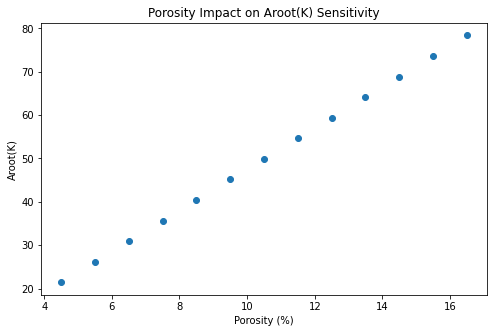

In [53]:
plt.figure(figsize=(8,5))
por=np.linspace(4.5,16.5,13)
plt.scatter(por,y_pred_sensitivity.iloc[0:13])
plt.title('Porosity Impact on Aroot(K) Sensitivity')
plt.xlabel('Porosity (%)')
plt.ylabel('Aroot(K)')

Text(0, 0.5, 'Aroot(K)')

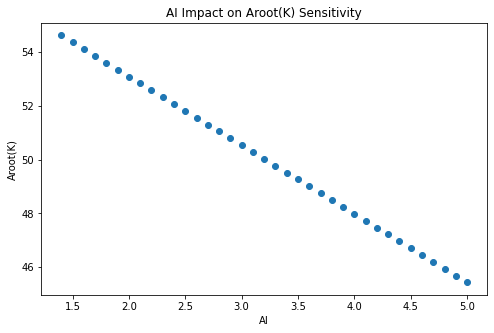

In [54]:
plt.figure(figsize=(8,5))
AI=np.linspace(1.4,5,37)
plt.scatter(AI,y_pred_sensitivity.iloc[13:50])
plt.title('AI Impact on Aroot(K) Sensitivity')
plt.xlabel('AI')
plt.ylabel('Aroot(K)')

Text(0, 0.5, 'Aroot(K)')

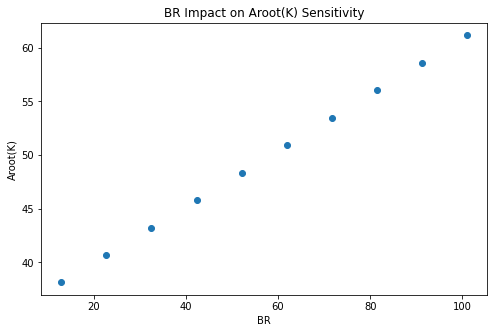

In [55]:
plt.figure(figsize=(8,5))
BR=np.linspace(13,101,10)
plt.scatter(BR,y_pred_sensitivity.iloc[50:60])
plt.title('BR Impact on Aroot(K) Sensitivity')
plt.xlabel('BR')
plt.ylabel('Aroot(K)')

Text(0, 0.5, 'Aroot(K)')

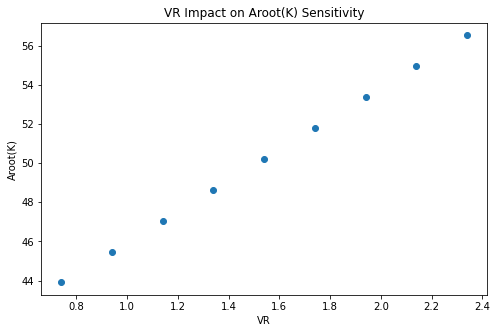

In [56]:
plt.figure(figsize=(8,5))
VR=np.linspace(0.74,2.34,9)
plt.scatter(VR,y_pred_sensitivity.iloc[60:69])
plt.title('VR Impact on Aroot(K) Sensitivity')
plt.xlabel('VR')
plt.ylabel('Aroot(K)')